In [80]:
# import statements        
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

# my files
import db_connection
import db_edit
import db_search
import file_io
import quality_control_tests
import graphs_helper

In [95]:
def red(ldo): return ldo/130000
def blue(ldo): return 1/(np.power(ldo+1,0.2))
def green(ldo): return 0
    #eqn = np.exp(-np.power((ldo-5000)/(np.sqrt(2)*2000),2))/np.sqrt(2*math.pi*2000*2000)
    #if eqn >1:
    #    print("aaaahhahahah")
    #    return 1
    #else: return eqn


mysql connection successfully established with DATA_SILSO_HISTO
observers sucessfully retrieved
Closing MySQL connection...

mysql connection successfully established with DATA_SILSO_HISTO
data successfully retrieved
Closing MySQL connection...
6447	8019	6	33	24	1117	583	210	97	706	117	86	42	6601	420	0	0	324	2045	2292	22	1026	149	354	565	124	301	5199	6	474	870	243	1223	23	0	41	2600	487	212	7757	183	626	21	1736	451	1812	2048	0	1299	3963	12889	4593	0	297	0	0	0	1149	891	25	3725	103	6218	1161	281	1202	2423	88	161	1363	10360	3618	247	1178	0	315	854	79	210	827	155	241	854	960	0	8	10	17	25	110	139	303	233	2152	638	93	2957	326	2340	1260	1047	309	286	392	92	1970	3024	377	537	6472	129	243	107	85	0	102	842	211	160	113	591	202	104	113	6337	248	427	1065	177	154	1749	2679	673	377	142	1760	1589	58	454	260	288	294	2640	664	934	296	970	493	2528	1673	4747	674	277	143	1897	323	224	264	814	412	266	32	181	200	112	35	28	103	248	5024	2709	126	269	134	385	141	112	273	113	294	51	836	1296	3168	1220	1220	40	307

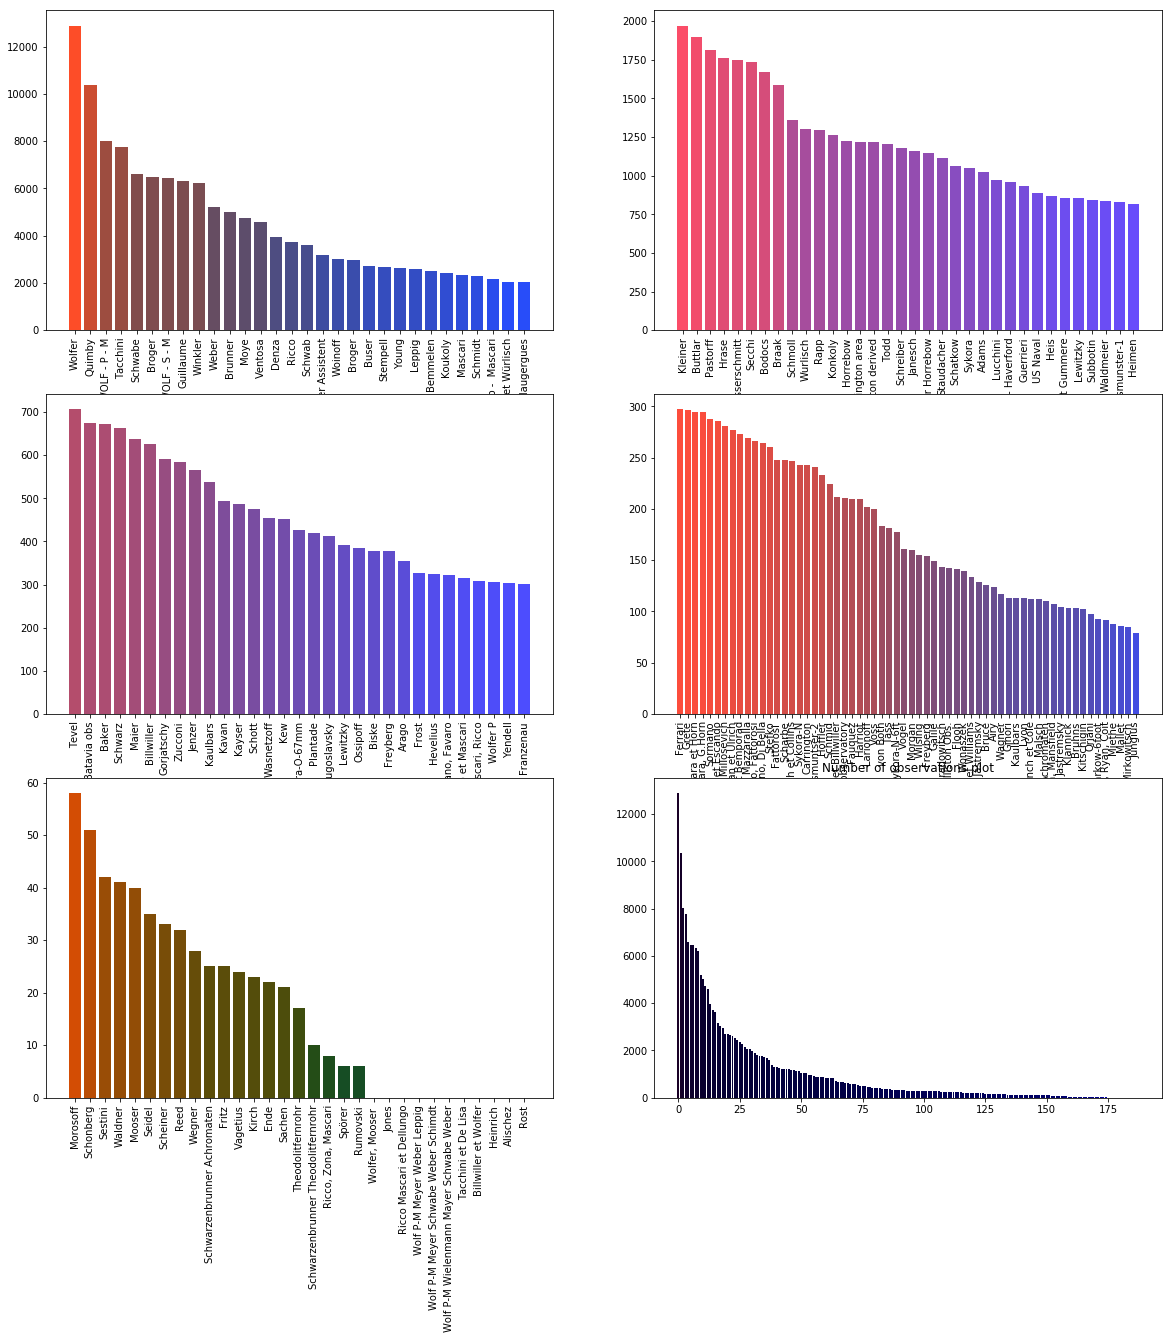

In [96]:

# method to identify observers in DATA_SILSO_HISTO.OBSERVERS and how much data is associated with each one
def size_data_by_observer_hist():
    observers = db_search.select_all_observers()
    data = db_search.select_all_data()
    #obs_alias_dictionary = graphs_helper.data_by_obs_alias_histo()

    #key = observer, value = data
    dic = {}
    for o in observers:
        dic[o] = [d for d in data if d[3]==o[0]]# slow but short
        print(len(dic[o]),end="\t")
    print("\n")
    print(len(dic))
    
    obs_sorted = [[len(dic[o]),o] for o in dic]
    obs_sorted.sort(reverse=True)# biggest to smallest
    obs_sorted = [i[1] for i in obs_sorted]
    
    
    
    
    #### plot some nice figures

    # plot a histogram of the number of data each observer has

    # those with greater or equal to 2000 datapoints
    x_2000 = [o[1] for o in obs_sorted if len(dic[o])>=2000]
    bins_2000 = len(x_2000)
    heights_2000 = [len(dic[o]) for o in obs_sorted if len(dic[o])>=2000]
    colors_2000 = [(len(dic[o])/13000,0.3,2000/len(dic[o]),1.0) for o in obs_sorted if len(dic[o])>=2000]
    
    # those with x \in [800,2000)
    x_800 = [o[1] for o in obs_sorted if len(dic[o])>=800 and len(dic[o])<2000]
    bins_800 = len(x_800)
    heights_800 = [len(dic[o]) for o in obs_sorted if len(dic[o])>=800 and len(dic[o])<2000]
    colors_800 = [(len(dic[o])/2000,0.3,800/len(dic[o]),1.0) for o in obs_sorted if len(dic[o])>=800 and len(dic[o])<2000]
    
    # those with x \in [300,800)
    x_300 = [o[1] for o in obs_sorted if len(dic[o])>=300 and len(dic[o])<800]
    bins_300 = len(x_300)
    heights_300 = [len(dic[o]) for o in obs_sorted if len(dic[o])>=300 and len(dic[o])<800]
    colors_300 = [(len(dic[o])/1000,0.3,300/len(dic[o]),1.0) for o in obs_sorted if len(dic[o])>=300 and len(dic[o])<800]
    
    # those with x \in [70,300)
    x_70 = [o[1] for o in obs_sorted if len(dic[o])>=70 and len(dic[o])<300]
    bins_70 = len(x_70)
    heights_70 = [len(dic[o]) for o in obs_sorted if len(dic[o])>=70 and len(dic[o])<300]
    colors_70 = [(len(dic[o])/300,0.3,70/len(dic[o]),1.0) for o in obs_sorted if len(dic[o])>=70 and len(dic[o])<300]
    
    # those with x \in [0,70)
    x_0 = [o[1] for o in obs_sorted if len(dic[o])<70]
    bins_0 = len(x_0)
    heights_0 = [len(dic[o]) for o in obs_sorted if len(dic[o])<70]
    colors_0 = [(len(dic[o])/70,0.3,1/(len(dic[o])+1),1.0) for o in obs_sorted if len(dic[o])<70]
    
    
    
    
    plt.figure(figsize=(20,20))
    
    plt.subplot(321)
    plt.bar(x=[i for i in range(bins_2000)],height=heights_2000,align='center',tick_label=x_2000,color=colors_2000)
    plt.xticks(rotation=90)
    
    plt.subplot(322)
    plt.bar(x=[i for i in range(bins_800)],height=heights_800,align='center',tick_label=x_800,color=colors_800)
    plt.xticks(rotation=90)
    
    plt.subplot(323)
    plt.bar(x=[i for i in range(bins_300)],height=heights_300,align='center',tick_label=x_300,color=colors_300)
    plt.xticks(rotation=90)
    
    plt.subplot(324)
    plt.bar(x=[i for i in range(bins_70)],height=heights_70,align='center',tick_label=x_70,color=colors_70)
    plt.xticks(rotation=90)
    
    plt.subplot(325)
    plt.bar(x=[i for i in range(bins_0)],height=heights_0,align='center',tick_label=x_0,color=colors_0)
    plt.xticks(rotation=90)
    
    plt.subplot(326)
    

    fancy_colors = [(red(len(dic[o])),green(len(dic[o])),blue(len(dic[o])),1.0) for o in obs_sorted]
    plt.bar(x=[i for i in range(len(dic))],height=[len(dic[o]) for o in obs_sorted],color=fancy_colors)
    
    plt.title("Number of observations plot")
    
    plt.show()

size_data_by_observer_hist()
